# HW 7

### 8.2

Text(0, 0.5, '$\\Phi$')

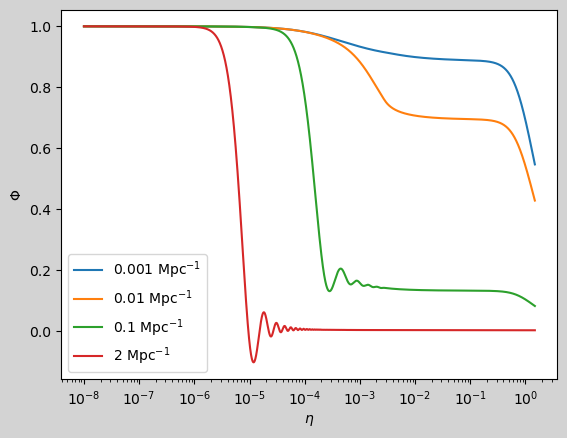

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

h = .7
H_0 = h/(3e17)
Omega_m = .3
Omega_r = 4.15e-5 / h**2
Omega_lambda = .7
a_eq = 4.15e-5 / (Omega_m * h**2)

def get_eta(a, Omega_m=Omega_m, a_eq=a_eq):
    return 2/(H_0 * Omega_m**.5) * ((a + a_eq)**.5 - a_eq**.5)

def dy_deta(y, eta, k, Omega_m=Omega_m, Omega_r=Omega_r, H_0=H_0, Omega_lambda=Omega_lambda):
    a, theta_0, theta_1, delta, iu, phi = y
    
    H = H_0 * np.sqrt(Omega_m * a**(-3) + Omega_r * a**(-4) + Omega_lambda) 
    da_deta = a**2 * H
    
    dphi_deta = (a / (3 * da_deta)) \
                * ((3/2) * H_0**2 * (Omega_m*a**(-1)*delta + 4*Omega_r*a**(-2)*theta_0)\
                    - (k**2 + 3*(da_deta/a)**2) * phi)
    
    dtheta0_deta = -k*theta_1 - dphi_deta
    dtheta1_deta = (k/3)*theta_0 - (k/2)*phi
    ddelta_deta = -k*iu - 3*dphi_deta
    diu_deta = -k*phi - (da_deta/a) * iu

    if(a > 10*a_eq):
        dtheta0_deta = 0
        dtheta1_deta = 0
    
    return [da_deta, dtheta0_deta, dtheta1_deta, ddelta_deta, diu_deta, dphi_deta]

a_arr = np.logspace(-8,0,100000)
etas = get_eta(a_arr)

a_init = a_arr[0]
H_init = H_0*np.sqrt(Omega_r*a_init**(-4) + Omega_m*a_init**(-3) + Omega_lambda)

ks = np.array([0.001, 0.01, 0.1, 2]) * 3e10 / 3e24
sols = []
for k in ks:
    theta_0_0 = .5
    delta_0 = 3/2
    phi_0 = 1
    theta_1_0 = -k / (6 * a_init * H_init)
    iu_0 = -k / (2 * a_init * H_init)

    y_0 = (a_init, theta_0_0, theta_1_0, delta_0, iu_0, phi_0)

    sols.append(odeint(dy_deta, y_0, etas, args=(k,)))

fig,ax = plt.subplots()
fig.set_facecolor('lightgray')
ax.set_xscale('log')
k_in_mpc = [0.001, 0.01, 0.1, 2]
for i,k in enumerate(k_in_mpc):
    ax.plot(sols[i][:,0], sols[i][:,5], label=fr"${k}\ \text{{Mpc}}^{{-1}}$")
ax.legend()

plt.xlabel(r'$\eta$')
plt.ylabel('$\Phi$')

In [32]:
# now lets get the transfer function
phi_LSS = .9

ks_in_Mpc = np.logspace(-5,1,1000)
ks = ks_in_Mpc / 1e14

a_arr = np.logspace(-8,0,10000)
etas = get_eta(a_arr)

a_init = a_arr[0]
H_init = H_0*np.sqrt(Omega_r*a_init**(-4) + Omega_m*a_init**(-3) + Omega_lambda)

Ts = []
for k in ks:
    theta_0_0 = .5
    delta_0 = 3/2
    phi_0 = 1
    theta_1_0 = -k / (6 * a_init * H_init)
    iu_0 = -k / (2 * a_init * H_init)
    y_0 = (a_init, theta_0_0, theta_1_0, delta_0, iu_0, phi_0)

    Ts.append(odeint(dy_deta, y_0, etas, args=(k,))[-800][5])

growth_0 = odeint(dy_deta, y_0, etas, args=(ks[300],))[-1][5]/odeint(dy_deta, y_0, etas, args=(ks[300],))[-800][5]

Text(0, 0.5, '$T$')

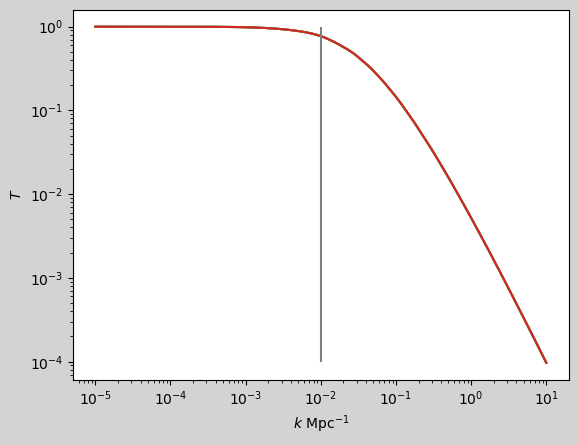

In [44]:
fig,ax = plt.subplots()
fig.set_facecolor('lightgray')
ax.set_xscale('log')
ax.set_yscale('log')
for i,k in enumerate(k_in_mpc):
    ax.plot(ks_in_Mpc, np.array(Ts)/phi_LSS)

plt.vlines(x=.01, ymin = 1e-4, ymax=1e0, color = 'gray')

plt.xlabel(fr'$k\ \text{{Mpc}}^{{-1}}$')
plt.ylabel('$T$')

## 8.13

Text(0, 0.5, '$\\sigma_R$')

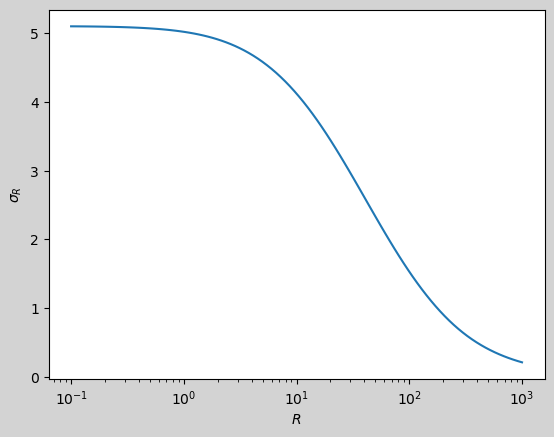

In [39]:
A_s = np.exp(3.048)*1e-10
n_s = 0.9682
k_p = 0.05 / 1e14

transfer = np.array(Ts)/phi_LSS

def P(k): #assumes a = 0
    return (8/25 * np.pi**2) * (A_s/Omega_m**2) * growth_0**2 * transfer[ks == k]**2 * (k**n_s / (H_0**4 * k_p**(n_s-1)))

def sigma(R):
    R = R/h * 1e14
    def integrand(k):
        return (3/(R*k)**3)**2 * (np.sin(k*R) - R*k*np.cos(k*R))**2 * P(k)/(2*np.pi)**3

    return np.sqrt(np.trapezoid(integrand(ks), ks)) / 1e14

sigmas = []
Rs = np.logspace(-1,3,100)
for R in Rs:
    sigmas.append(sigma(R))

fig,ax = plt.subplots()
fig.set_facecolor('lightgray')
ax.set_xscale('log')
#ax.set_yscale('log')
ax.plot(Rs, sigmas)

plt.xlabel(fr'$R$')
plt.ylabel('$\sigma_R$')

In [40]:
print(sigma(8))

4.291913939973511
